In [25]:
import pandas as pd
import numpy as np

In [26]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### Data description

| Feature  | Description            | Notes                                      |
|----------|------------------------|--------------------------------------------|
| survived | Survival               | 0 = No, 1 = Yes                            |
| pclass   | Ticket class           | 1 = 1st, 2 = 2nd, 3 = 3rd                 |
| sex      | Sex                    |                                            |
| Age      | Age in years           |                                            |
| sibsp    | # of siblings / spouses aboard the Titanic |                                    |
| parch    | # of parents / children aboard the Titanic |                                    |
| ticket   | Ticket number          |                                            |
| fare     | Passenger fare         |                                            |
| cabin    | Cabin number           |                                            |
| embarked | Port of Embarkation    | C = Cherbourg, Q = Queenstown, S = Southampton |


In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
train.drop(["PassengerId","Cabin","Name","Ticket"],axis=1, inplace=True)
train.dropna(subset=['Embarked'], inplace=True)

In [32]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [33]:
train['Sex'].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

In [34]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [35]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [36]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
train["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

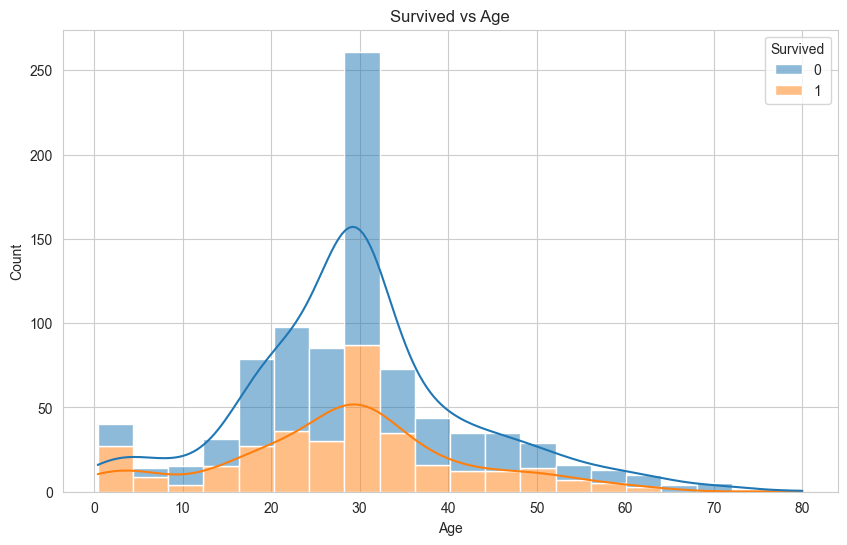

In [39]:
# Set the style of seaborn plots
sns.set_style("whitegrid")

# Histogram: Survived vs Age
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Age', hue='Survived', multiple='stack', bins=20, kde=True)
plt.title('Survived vs Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

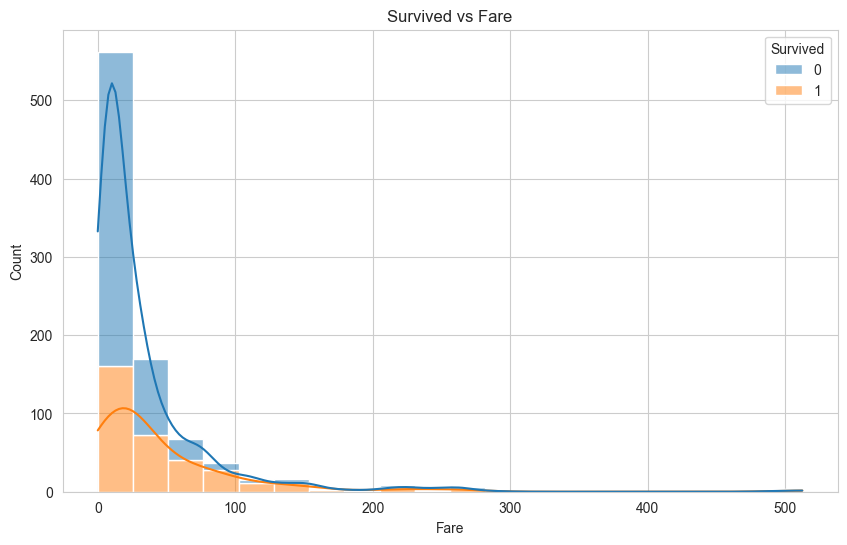

In [40]:
# Histogram: Survived vs Fare
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Fare', hue='Survived', multiple='stack', bins=20, kde=True)
plt.title('Survived vs Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

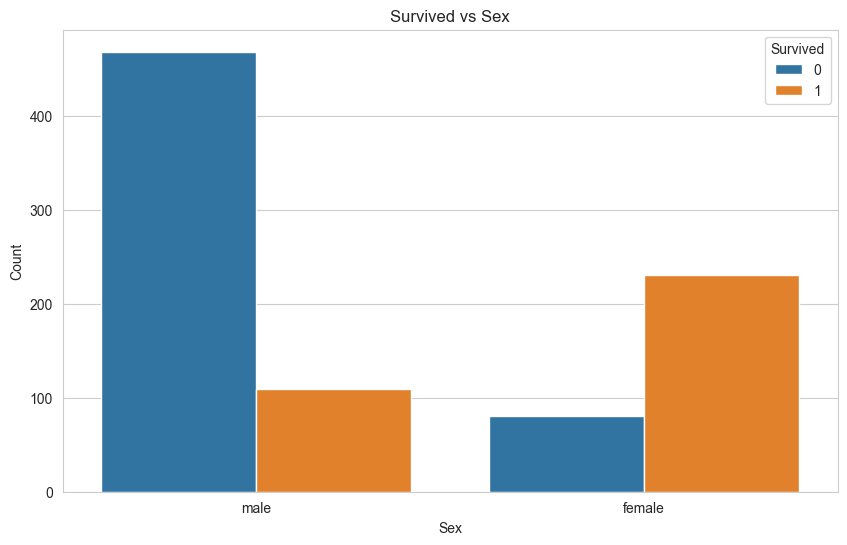

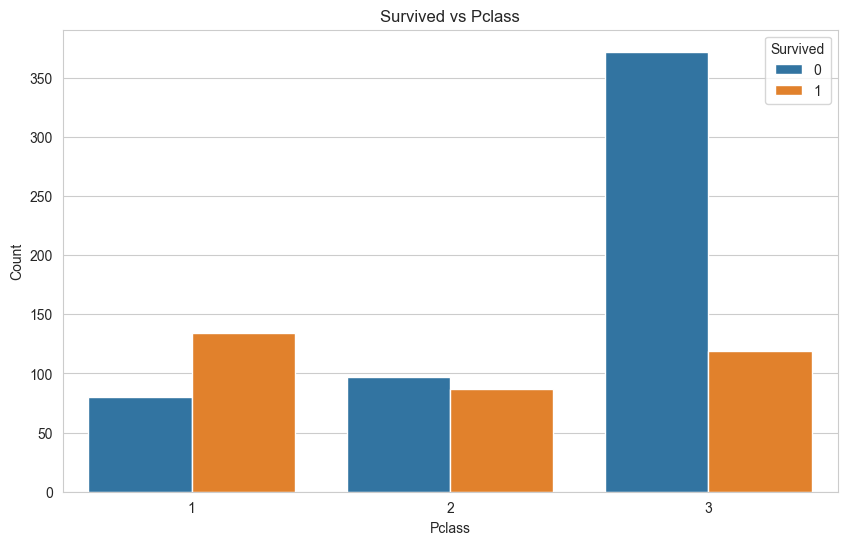

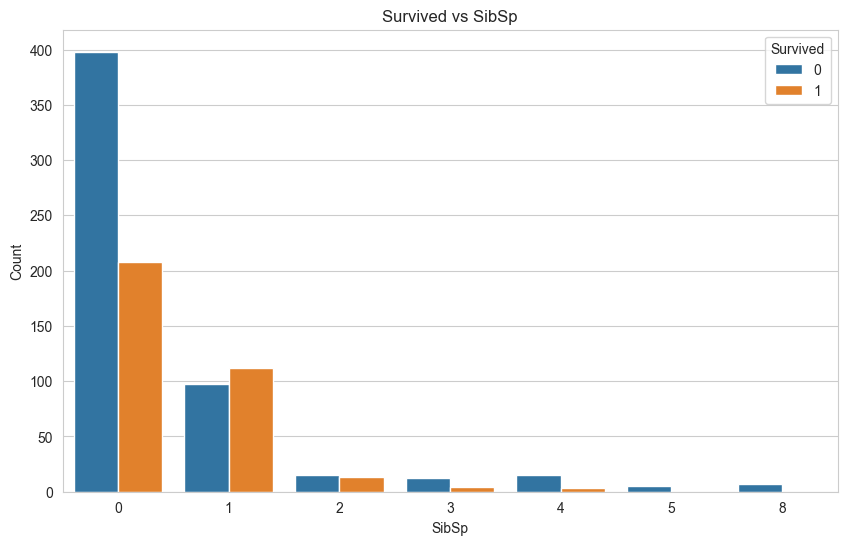

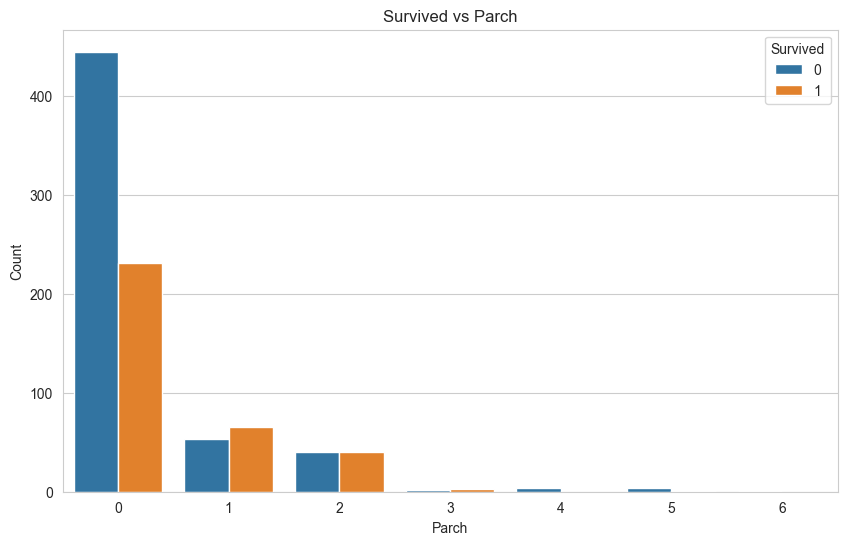

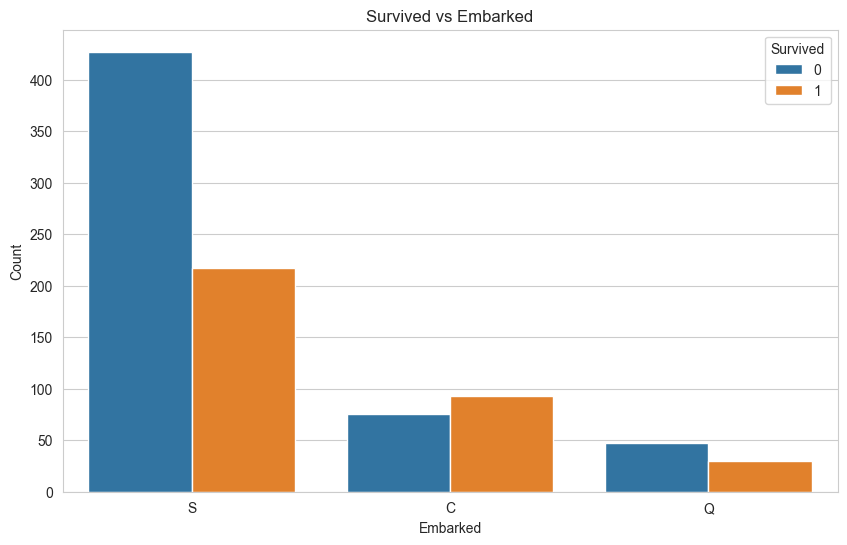

In [41]:
# Define the categorical variables
categorical_vars = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

# Create count plots for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train, x=var, hue='Survived')
    plt.title(f'Survived vs {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

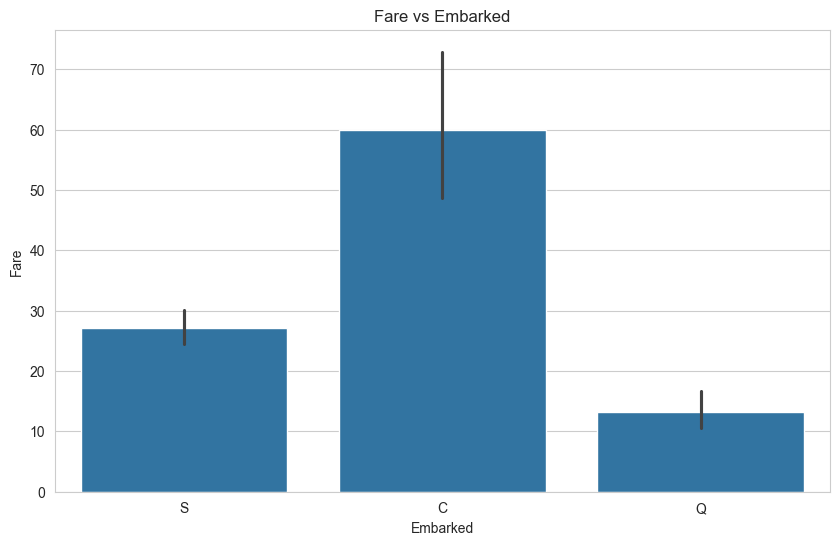

In [42]:
# Bar plot: Fare vs Embarked
plt.figure(figsize=(10, 6))
sns.barplot(data=train, x='Embarked', y='Fare')
plt.title('Fare vs Embarked')
plt.xlabel('Embarked')
plt.ylabel('Fare')
plt.show()

In [43]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [44]:
# Perform one-hot encoding for 'Sex' and 'Embarked'
one_hot_encoded = pd.get_dummies(train[['Sex', 'Embarked']])


# Convert boolean values to integers (1s and 0s)
one_hot_encoded = one_hot_encoded.astype(int)

# Concatenate the one-hot encoded columns with the original DataFrame
train = pd.concat([train, one_hot_encoded], axis=1)

# Remove the original 'Sex' and 'Embarked' columns
train.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [45]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [46]:
# Define the age bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Define labels for the age groups
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column 'Age_Group' based on the specified age ranges
train['Age_Group'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)

# Print the result
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Age_Group' column
train['Age_Group'] = label_encoder.fit_transform(train['Age_Group'])

# Print the result
train.head()



,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Group
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,2
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,3
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,2
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,3
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,3


In [47]:
# Define the fare bins
fare_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Define labels for the fare groups
fare_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# Create a new column 'Fare_Group' based on the specified fare ranges
train['Fare_Group'] = pd.cut(train['Fare'], bins=fare_bins, labels=fare_labels, right=False)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Fare_Group' column
train['Fare_Group'] = label_encoder.fit_transform(train['Fare_Group'])

train.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Group,Fare_Group
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,2,0
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,3,5
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,2,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,3,5
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,3,0


In [49]:
train_data = train.drop(['Age','Fare'],axis=1)
train_data.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Group,Fare_Group
0,0,3,1,0,0,1,0,0,1,2,0
1,1,1,1,0,1,0,1,0,0,3,5
2,1,3,0,0,1,0,0,0,1,2,0
3,1,1,1,0,1,0,0,0,1,3,5
4,0,3,0,0,0,1,0,0,1,3,0


In [50]:
X=train_data.drop(["Survived"],axis=1)
y=train_data['Survived']

In [51]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model_l = LogisticRegression()
model_r = RandomForestClassifier()

In [53]:
model_params = {

    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,100,150]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10,0.5]
        } 
    }
}

In [55]:
from sklearn.model_selection import GridSearchCV
scores=[]
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
best = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best

,model,best_score,best_params
0,random_forest,0.811474,{'n_estimators': 100}
1,logistic_regression,0.804472,{'C': 1}


In [60]:
from sklearn.metrics import recall_score, f1_score, confusion_matrix, accuracy_score, precision_score, classification_report

# Retrieve the best model and its parameters from the results
best_model_row = best_model.loc[best_model['best_score'].idxmax()]
best_model_name = best_model_row['model']
best_model_params = best_model_row['best_params']

# Initialize the best model with the best parameters
best_model_selected = model_params[best_model_name]['model']
best_model_selected.set_params(**best_model_params)

best_model_selected.fit(X_train,y_train)
# Make predictions on the test set
y_pred_test = best_model_selected.predict(X_test)

# Evaluate performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print evaluation metrics and other relevant information
print("Test Set Accuracy:", accuracy_test)
print("Test Set Precision:", precision_test)
print("Test Set Recall:", recall_test)
print("Test Set F1-Score:", f1_test)
print("Classification Report for Test Set:")
print(report_test)
print("Confusion Matrix for Test Set:")
print(conf_matrix)

NameError: name 'best_model' is not defined